In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#os.chdir('/Users/lynnsorensen/surfdrive/Arousal_asn_export')

In [2]:
# load in the trackers
tracker_8opt = joblib.load('Results/tracker_ObjectRecognition_8options.pkl')
tracker_4opt = joblib.load('Results/tracker_ObjectRecognition_4options.pkl')
tracker_2opt = joblib.load('Results/tracker_ObjectRecognition_2options.pkl')


1_street


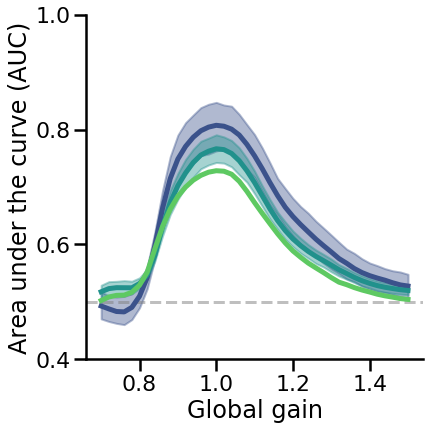

2_food


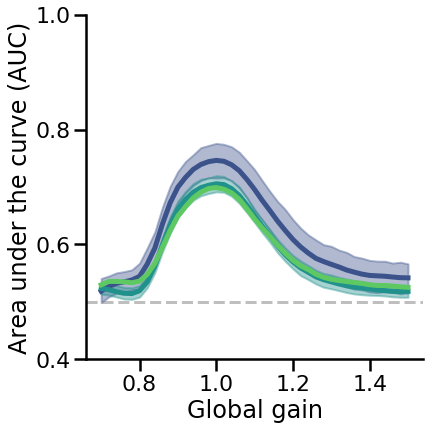

In [3]:
# FIGURE 3C
cond = [2,4,8]
colors = sns.color_palette('viridis', 3)
sns.set_context('poster')

for dataset in ['1_street', '2_food']:
    print(dataset)

    df = pd.DataFrame({'Condition': np.ones(len(tracker_8opt['gains'])) * 8,
                       'Iteration': np.ones(len(tracker_8opt['gains'])),
                       'Gain': tracker_8opt['gains'],
                       'AUC': tracker_8opt[dataset]['Test']['AUC']
                       })
    c = len(df)
    for t, tracker in enumerate([tracker_2opt, tracker_4opt]):
        for iter in range(tracker['iterations']):
            for i, g in enumerate(tracker['gains']):
                df.loc[c, 'Iteration'] = iter
                df.loc[c, 'Condition'] = cond[t]
                df.loc[c, 'Gain'] = g
                df.loc[c, 'AUC'] = tracker[dataset]['iter_' + str(iter)]['Test']['AUC'][i]
                c = c+1

    fig, ax = plt.subplots(1, figsize=(6.5, 6.5))
    plt.axhline(0.5, c='gray', ls='--', alpha=0.5)

    sns.lineplot(data=df, x='Gain', y='AUC', palette=sns.color_palette('viridis', len(cond)),
                  hue='Condition', hue_order=cond,
                  legend=False, linewidth=5, err_kws={'alpha': 0.4})

    plt.xlabel('Global gain')
    plt.ylabel('Area under the curve (AUC)')
    plt.ylim([0.4, 1])
    plt.yticks([0.4, 0.6, 0.8, 1])
    sns.despine()
    #plt.legend(loc=(1.04, 0), frameon=False)
    plt.tight_layout()
    plt.show()

1_street


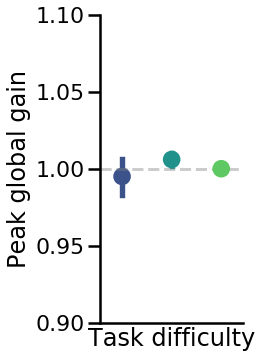

2_food


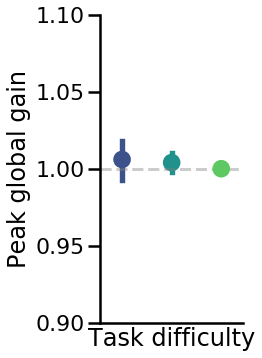

In [5]:
# FIGURE 3D
colors = sns.color_palette('viridis', 3)

for dataset in ['1_street', '2_food']:
    print(dataset)

    max_gain = [tracker_8opt['gains'][int(np.median(np.where(tracker_8opt[dataset]['Test']['AUC'] == tracker_8opt[dataset]['Test']['AUC'].max())))]]
    condition = [8]
    for i, tracker in enumerate([tracker_4opt, tracker_2opt]):
        for iter in range(20):
            max_gain.append(tracker['gains'][int(np.median(np.where(tracker[dataset]['iter_' + str(iter)]['Test']['AUC'] == tracker[dataset]['iter_' + str(iter)]['Test']['AUC'].max())[0]))])
            condition.append(list(reversed(cond))[i+1])

    plt.figure(figsize=(4, 5.5))
    ax = sns.pointplot(x=condition, y=max_gain, hue=condition, palette=colors, 
                       join=False,
                       dodge=True,
                       legend=False)

    ax.get_legend().remove()
    ax.axhline(1, c='gray', alpha=0.4, ls='--')
    #ax.set_ylim([0.9, 1.13])
    ax.set_yticks([0.9, 0.95, 1, 1.05, 1.1])
    ax.set_xticks([])
    ax.set_ylabel('Peak global gain')
    ax.set_xlabel('Task difficulty')
    sns.despine()
    plt.tight_layout()
    plt.show()
